# ModÃ¨le de mÃ©langes gaussiens pour la gÃ©nÃ©ration de donnÃ©es

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
from sklearn.mixture import GaussianMixture as GMM

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

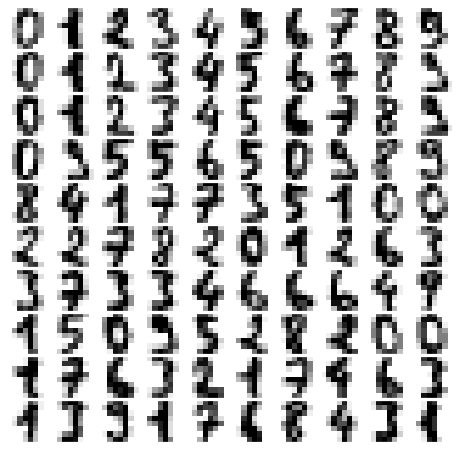

In [4]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [5]:
data = digits.data
data.shape

(1797, 64)

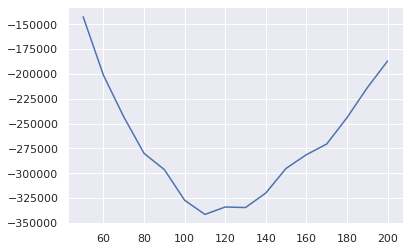

In [7]:
K_components = np.arange(50, 210, 10)
models = [GMM(K, covariance_type='full', random_state=0)
          for K in K_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(K_components, aics);